In [29]:
import seaborn as sns
import numpy as np
import pandas as pd

1 Load Dataset & Inspect it

In [30]:
iris_dataset = sns.load_dataset("iris")
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [31]:
display("The classes of the iris dataset are: ",iris_dataset['species'].unique())

display("The shape of the iris dataset is: ", iris_dataset.shape)

display("The columns of the iris dataset are: ", iris_dataset.columns)

'The classes of the iris dataset are: '

array(['setosa', 'versicolor', 'virginica'], dtype=object)

'The shape of the iris dataset is: '

(150, 5)

'The columns of the iris dataset are: '

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Create a scatter plot to check the samples distribution.

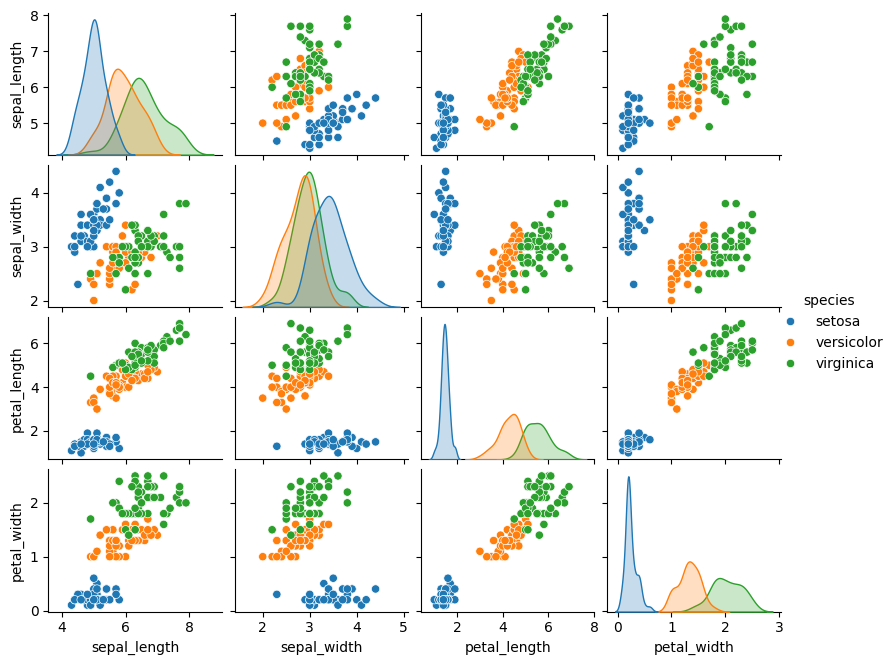

In [32]:
pairplot_figure = sns.pairplot(iris_dataset, hue="species")
pairplot_figure.figure.set_size_inches(9, 6.5)

Interpretation:

Looking at the diagonal plots of the pairplot to check feature distributions:

- The Setosa species can be differentiated from the Versicolor and Virginica species based on sepal_length, petal_length and petal_width. 

2 Linear Models for Classification

The aim is to build a binary classification problem. Let us retain the two species - "Setosa" and "Virginica".

In [54]:
iris_dataset_subset = pd.DataFrame(
    iris_dataset
    .set_index("species")
    .loc[["setosa", "virginica"]]
    .reset_index()
    .drop(['sepal_width', 'petal_width'], axis=1)
)

display(iris_dataset_subset.head(3))

feature_columns = ["sepal_length", "petal_length"]
target_columns = iris_dataset_subset["species"]

,species,sepal_length,petal_length
0,setosa,5.1,1.4
1,setosa,4.9,1.4
2,setosa,4.7,1.3


2-1 Visualize feature distribution by class

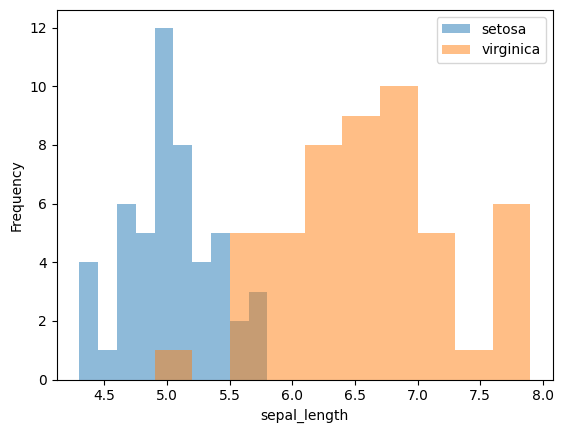

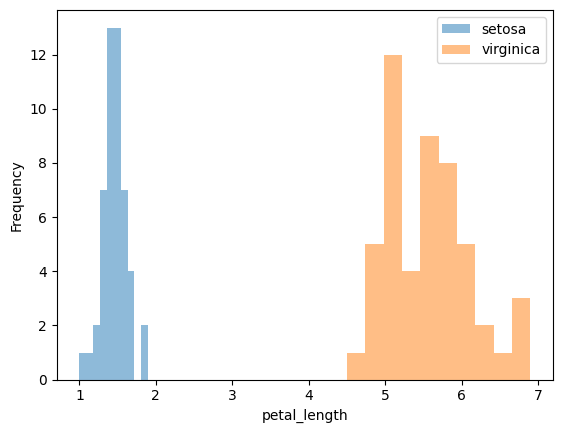

In [55]:
import matplotlib.pyplot as plt

for feature_name in feature_columns:
    plt.figure()
    # plot the histogram for each species
    iris_dataset_subset.groupby('species')[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

We observe that we have quite a simple problem. As sepal_length increases, the probability that the flower belongs to the "Virginica" species is closer to 1. However, the petal_length is not helpful for predicting the flower species.


2-2 Model Fit: Logistic Regression (for binary classification)

For model fitting, we seperate the target from the data and create a test-train split.

In [36]:
from sklearn.model_selection import train_test_split

iris_train, iris_test = train_test_split(iris_dataset_subset, random_state=0)

data_train = iris_train[feature_columns]
data_test = iris_test[feature_columns]

target_train = iris_train[target_columns]
target_test = iris_test[target_columns]

In [37]:
feature_columns[0]
feature_columns[1]

'petal_length'

In [38]:
len(target_columns)

1

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)

print(f"Accuracy on the test set: {accuracy:.3f}")

Accuracy on the test set: 1.000


/Users/AnanyaPal1/Documents/data-engineering/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

<Axes: xlabel='sepal_length', ylabel='petal_length'>

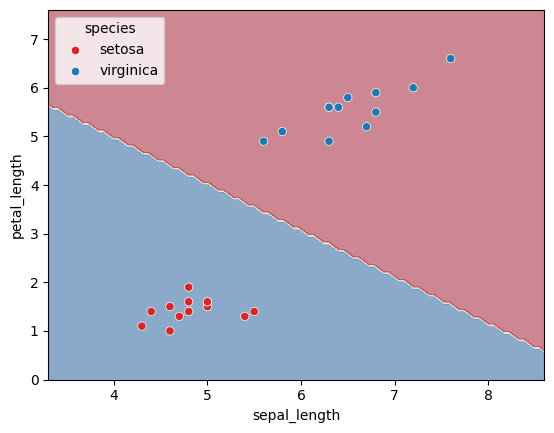

In [56]:
DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method='predict',
    cmap='RdBu_r',
    alpha=0.5    
)

sns.scatterplot(
    data=iris_test,
    x = feature_columns[0],
    y = feature_columns[1],
    hue=target_columns,
    palette=["tab:red", "tab:blue"],
)